# nmi | spring 2024
## lecture 18 : finite difference methods


### 7.2 finite difference methods


finite difference methods (FDM) replace derivatives with simpler, discrete approximations.
</br>


let $y(t)$ be a function with at least four continuous derivatives.
</br></br>

\begin{align}
  y'(t) &= \frac{y(t+h) - y(t-h)}{2h} - \frac{h^2}{3!}y'''(c) \\
  y''(t) &= \frac{y(t+h) - 2y(t) + y(t-h)}{h^2} - \frac{h^2}{2\cdot 3!}y^{(iv)}(c).
\end{align}
</br>

oc both first and second derivitives have error proportional to $h^2$.
</br>


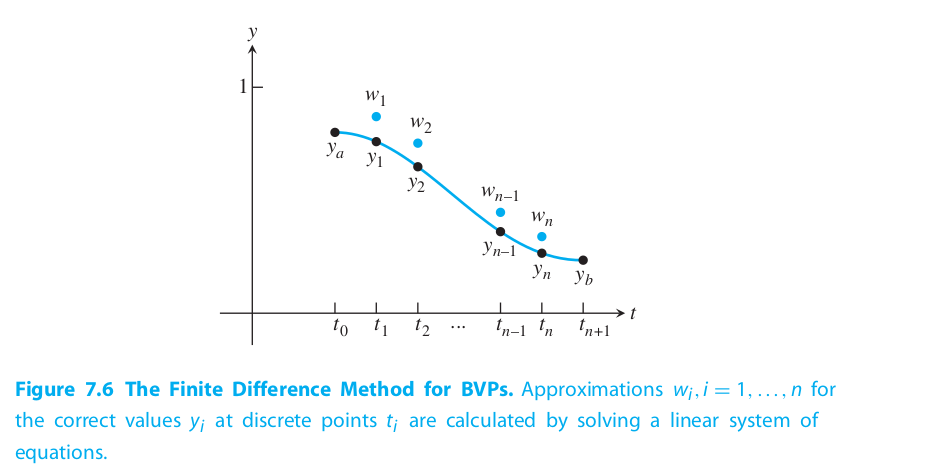

if linear BVP, then solve with gauss elimination or iterative, else an algebraic system of nonlinear equations.
</br>


#### 7.2.1 linear BVP


##### example 08


example 08 revisits example 07 using finite differences.
</br>

\begin{align}
  \text{example 08} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = 4y \\
      y(0) = 1 \\
      y(1) = 3.
    \end{array}
  \right.
\end{align}
</br>


consider the discrete form of differential equation $y'' = 4y$ using the centered-difference form for the second derivative. ie,
</br></br>

\begin{align}
  \frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - 4w_i &= 0 \\
  \\
  \Downarrow \qquad\qquad\qquad & \\
  \\
  w_{i+1} + (-4h^2 -2)w_i + w_{i-1} &= 0.
\end{align}
</br>

for $n = 3$ points between interval end points, then step-size $h = \frac{1}{n+1} = \frac{1}{3+1} = \frac{1}{4}$. including boundary conditions gives three equations in three unknowns:
</br></br>

\begin{align}
  1 + (-4h^2 - 2)w_1 + w_2 = 0 &\quad y(0) = 1 \\
  w_1 + (-4h^2 - 2)w_2 + w_3 = 0 &\quad \\
  w_2 + (-4h^2 - 2)w_3 + 3 = 0 &\quad y(1) = 3.
\end{align}
</br>

$\qquad\qquad\qquad \Downarrow \quad h = \frac{1}{4}$
</br></br>

$$\begin{bmatrix}
  -\frac{9}{4} & 1 & 0 \\
  1 & -\frac{9}{4} & 1 \\
  0 & 1 & -\frac{9}{4}
\end{bmatrix}
\begin{bmatrix}
  w_1 \\
  w_2 \\
  w_3
\end{bmatrix}
=
\begin{bmatrix}
  -1 \\
  0 \\
  -3
\end{bmatrix}.$$
</br>

$\qquad\qquad\qquad \Downarrow \quad $ by gaussian elimination,
</br></br>

$\qquad\qquad\ w = [1.0249,1.3061,1.9138]^T$.
</br>


###### code



example 08, step-size h = 0.1



,t,y,w
0,0.0,1.0000,1.0000
1,0.1,0.9778,0.9783
2,0.2,0.9948,0.9957
3,0.3,1.0517,1.0529
4,0.4,1.1508,1.1523
...,...,...,...
6,0.6,1.4934,1.4951
7,0.7,1.7507,1.7523
8,0.8,2.0782,2.0795
9,0.9,2.4892,2.4900


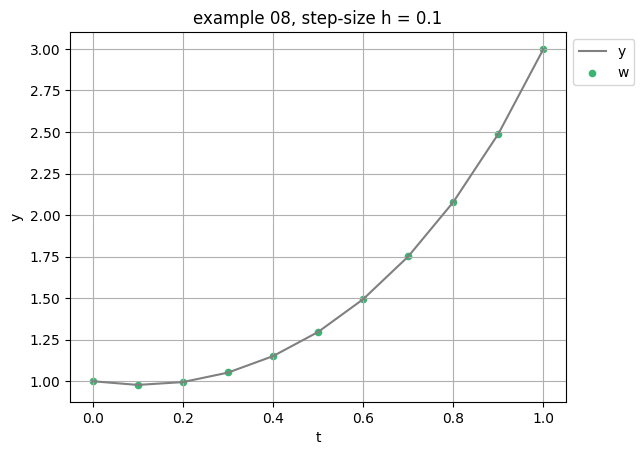

In [15]:
# example 08

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 231112  ksa  size of [a],[b] determined from interior points n.
#              to modify problem:
#                1) time interval [t], boundary values [bv]
#                1) y_actual(), its jacobian diagonal [a];
#                2) n, dataframe title, colums as needed

def main():
  # actual
  def y_actual(t):
    dy = np.zeros_like(t)

    e2p,e2m = np.exp(2),np.exp(-2)
    c1 = (3-e2m)/(e2p-e2m)
    c2 = (e2p-3)/(e2p-e2m)
    dy = c1*np.exp(2*t) + c2*np.exp(-2*t)

    return dy

  # bvp: bv,t
  bv = [1,3]
  t = [0,1]

  # interval, step-size
  n = 9 # points between interval end points
  h = (t[1]-t[0])/(n+1)

  # newton multivariate: df = [a],-f = -[b]
  if False: # hard code
    a = np.array([[-2.25,1,0],[1,-2.25,1],[0,1,-2.25]])
    b = np.array([[-1],[0],[-3]])
    #n = b.shape[0] # points between interval end points
  else:
    a = np.zeros((n,n))
    np.fill_diagonal(a,-4*pow(h,2)-2)
    for i in range(n-1):
      a[i,i+1] = a[i+1,i] = 1
    b = np.zeros((n,1))
    b[0],b[-1] = -bv[0],-bv[1]

  # actual (t,y)
  ts = np.linspace(t[0],t[1],n+2)
  ys = y_actual(ts)
  cols = ["t","y","w"]

  # dataframe, actual
  ds = np.zeros((n+2,3)) # t,y,w
  ds[:,0] = ts
  ds[:,1] = ys

  # dataframe, bv
  ds[0,2] = bv[0]; ds[-1,1] = ds[-1,2] = bv[1]

  # dataframe, calc via solver
  ws = np.zeros_like(b) # initial = 0
  ws = np.linalg.solve(a,b)
  ds[1:(ws.size+1),2] = ws.ravel()

  # dataframe
  s_title = "example 08, step-size h = " + str(h)
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",4)
  df = pd.DataFrame(data=ds,columns=cols)
  if True: # spreadsheet
    display(df)

  # plot
  if True: # plot ~ uses pandas dataframe
    ax1  = df.plot(x="t",y="y",label="y",color="0.5")
    ax11 = df.plot(x="t",y="w",label="w",ax=ax1,color="mediumseagreen",marker="o",kind = "scatter")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.2,.8,1,2))
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()


##### example 08, part 2: error


the absolute differences $\approx 10^{-2}$. to reduce error, obviously increase $n$ to decrease $h$.
</br></br>

$$\begin{bmatrix}
  -4h^2-2 & 1 & 0 & \cdots & 0 & 0 & 0 \\
  1 & -4h^2-2 & \ddots & & 0 & 0 & 0 \\
  0 & 1 & \ddots & \ddots & 0 & 0 & 0 \\
  \vdots & & \ddots & \ddots & \ddots && \vdots \\
  0 & 0 & 0 & \ddots & \ddots & 1 & 0 \\
  0 & 0 & 0 & & \ddots & -4h^2-2 & 1 \\
  0 & 0 & 0 & \cdots & 0 & 1 & -4h^2-2
\end{bmatrix}
\begin{bmatrix}
  w_1 \\
  w_2 \\
  w_3 \\
  \vdots \\
  w_{n-1} \\
  w_n
\end{bmatrix}
=
\begin{bmatrix}
  -1 \\
  0 \\
  0 \\
  \vdots \\
  0 \\
  0 \\
  -3
\end{bmatrix}.$$
</br>

sources of error: truncation with centered difference, solver. for step-size $h < \epsilon_{\mu}$, truncation matters more. expect this error of $\mathcal{O}(h^2)$ to decrease as $\mathcal{O}(n^{-2})$ as the number of subintervals $n+1$ increases.
</br></br>

on log-log plot, $n$ vs error is linear with slope $-2$. ie, $log(E) \approx a + b\cdot log(n)$ where $ b = -2$. ie, error $E \approx Kn^{-2}$. $\checkmark$
</br>


###### code


In [ ]:
# no, im totally not coding that this hour; believe in the textbook.
# but theres a model of this in a recent extra lecture suffixed with "x".



example 08, error x step-size



<ipython-input-20-cdbb29dacf94>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ds[int(k-ns[0]),1] = abs(ws[i_test] - y_test) # only at t = 0.75


,n,err
0,15.0,5.705158e-04
1,31.0,1.428159e-04
2,63.0,3.571569e-05
3,127.0,8.929656e-06
4,255.0,2.232460e-06
5,511.0,5.581178e-07


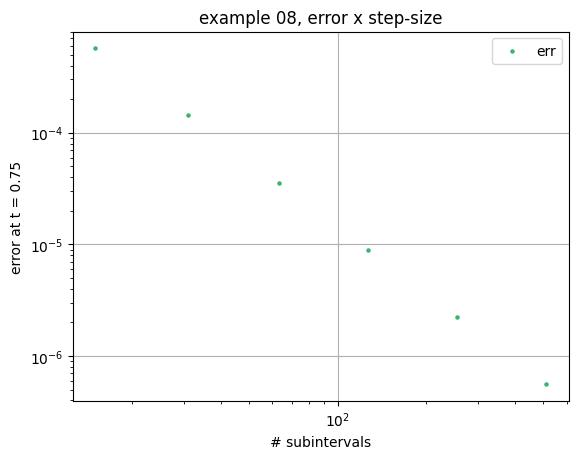

In [20]:
# example 08 pt 2, error vs step-size

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 231112  ksa  size of [a],[b] determined from interior points n.
#              to modify problem:
#                1) time interval [t], boundary values [bv]
#                1) y_actual(), its jacobian diagonal [a];
#                2) n, dataframe title, colums as needed

def main():

  # actual
  def y_actual(t):
    rc = np.zeros_like(t)

    e2p,e2m = np.exp(2),np.exp(-2)
    c1 = (3-e2m)/(e2p-e2m)
    c2 = (e2p-3)/(e2p-e2m)
    rc = c1*np.exp(2*t) + c2*np.exp(-2*t)

    return rc

  # bvp: bv,t
  bv = [1,3]
  t = [0,1]

  # point for error comparison
  t_test = 0.75
  y_test = y_actual(t_test)

  # subintervals, datastore
  ns = [4,10] # [2,8) = six runs with doubled subintervals
  ds = np.zeros((ns[1]-ns[0],2)) # n,error

  for k in range(ns[0],ns[1]):
    # interval, step-size
    n = pow(2,k) - 1 # points between interval end points
    h = (t[1]-t[0])/(n+1)

    # newton multivariate, set: df = [a],-f = -[b]
    a = np.zeros((n,n))
    np.fill_diagonal(a,-4*pow(h,2)-2)
    for i in range(n-1):
      a[i,i+1] = a[i+1,i] = 1
    b = np.zeros((n,1))
    b[0],b[n-1] = -bv[0],-bv[1]

    # newton multivariate, calc via solver
    ws = np.zeros_like(b) # initial = 0
    ws = np.linalg.solve(a,b)

    i_test = int(t_test/h) - 1 # index of test with subintervals of [t]
    ds[int(k-ns[0]),0] = n
    ds[int(k-ns[0]),1] = abs(ws[i_test] - y_test) # only at t = 0.75

  # dataframe
  s_title = "example 08, error x step-size"
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",6)
  df = pd.DataFrame(data=ds,columns=["n","err"])
  if True: # spreadsheet
    display(df)

  # plot
  if True: # plot
    ax1  = df.plot(x="n",y="err",label="err",color="mediumseagreen",marker=".",kind = "scatter")
    ax1.set_title(s_title)
    ax1.set_xlabel("# subintervals")
    ax1.set_ylabel("error at t = 0.75")
    #ax1.axis((.2,.8,1,2))
    ax1.loglog()
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()



##### usw

for any ﬁxed $t$ and step-size $h$, the FDM approximation $w_h(t)$ is order two in $h$ and can be extrapolated with a simple formula.

#### 7.2.2 nonlinear BVP


FDM applied to nonlinear DEQ results in a system of nonlinear algebra for multivariate newtons method (ch 2).
</br>


##### example 09


example 09 looks fresh. solve nonlinear BVP
</br></br>

\begin{align}
  \text{example 09} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = y - y^2 \\
      y(0) = 1 \\
      y(1) = 4.
    \end{array}
  \right.
\end{align}
</br>


the discretized form at $t_i$
</br></br>

\begin{align}
  \frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - w_i + w_i^2 &= 0 \\
  \\
  \Downarrow \qquad\qquad\qquad & \\
  \\
  w_{i-1} - (2+h^2)w_i + h^2w_i + w_{i+1} &= 0.
\end{align}
</br>

for $2\le i\le n-1$ and the boundary conditions:
</br></br>

\begin{align}
  y_a - (2+h^2)w_1 + h^2w_1^2 + w_2 &= 0 \\
  w_{n-1} - (2+h^2)w_n + h^2w_n^2  + y_b &= 0.
\end{align}
</br>

$\qquad\qquad\qquad \Downarrow \quad$ solve $F(w) = 0$ with newtons multivariate,
</br></br>

\begin{align}
  w^{k+1} &= w^k - DF(w^k)^{-1}F{w^k} \\
  \\
  &\quad\Downarrow \\
  \\
  DF(w^k)\Delta w &= -F(w^k), \quad \Delta w = w^{k+1} - w^k
  \\
  &\quad\Downarrow \\
  \\
\end{align}
</br>

$$F
\begin{bmatrix}
  w_1 \\
  w_2 \\
  \vdots \\
  w_{n-1} \\
  w_n
\end{bmatrix}
=
\begin{bmatrix}
  y_a-(2+h^2)w_1+h^2w_1^2+w_2 \\
  w_1-(2+h^2)w_2+h^2w_2^2+w_3 \\
  \vdots \\
  w_{n-2}-(2+h^2)w_{n-1}+h^2w_{n-1}^2+w_n \\
  w_{n-1}-(2+h^2)w_n+h^2w_n^2+y_b \\
\end{bmatrix}$$
</br>

where $y_a = 1$, $y_b = 4$. the jacobian $DF(w)$ of $F$ is
</br></br>

$$\begin{bmatrix}
  2h^2w_1-(2+h^2) & 1 & 0 & \cdots & 0 \\
  1 & 2h^2w_2-(2+h^2) & \ddots & \ddots & \vdots \\
  0 & 1 & \ddots & 1 & 0 \\
  \vdots & \ddots & \ddots & 2h^2w_{n-1}-(2+h^2) & 1 \\
  0 & \cdots & 0 & 1 & 2h^2w_n-(2+h^2)
\end{bmatrix}.$$
</br>

the $i$th row is the partial of the $i$th component of $F$ with respect to each $w_j$.
</br>



###### code, matlab


[matlab online](https://matlab.mathworks.com)
</br>

```
% Program 7.1 Nonlinear Finite Difference Method for BVP
% Uses Multivariate Newton's Method to solve nonlinear equation
% Inputs: interval inter, boundary values bv, number of steps n
% Output: solution w
% Example usage: w=sauer2_0709([0 1],[1 4],40)
function w=sauer2_0709(inter,bv,n) % nlbvpfd
  a=inter(1); b=inter(2); ya=bv(1); yb=bv(2);
  h=(b-a)/(n+1); % h is step size
  w=zeros(n,1); % initialize solution array w
  for i=1:20 % loop of Newton step
    w=w-jac(w,inter,bv,n)\f(w,inter,bv,n);
  end
  plot([a a+(1:n)*h b],[ya w' yb]); % plot w with boundary data

function y=f(w,inter,bv,n)
  y=zeros(n,1);h=(inter(2)-inter(1))/(n+1);
  y(1)=bv(1)-(2+h^2)*w(1)+h^2*w(1)^2+w(2);
  y(n)=w(n-1)-(2+h^2)*w(n)+h^2*w(n)^2+bv(2);
  for i=2:n-1
    y(i)=w(i-1)-(2+h^2)*w(i)+h^2*w(i)^2+w(i+1);
  end

function a=jac(w,inter,bv,n)
  a=zeros(n,n);h=(inter(2)-inter(1))/(n+1);
  for i=1:n
    a(i,i)=2*h^2*w(i)-2-h^2;
  end
  for i=1:n-1
    a(i,i+1)=1;
    a(i+1,i)=1;
  end
```



###### code, python




program 7.1, interior points n =20



,t,bv,wi
0,0.00000,1.0,1.00000
1,0.04762,NaN,1.27284
2,0.09524,NaN,1.54490
3,0.14286,NaN,1.81504
4,0.19048,NaN,2.08183
...,...,...,...
17,0.80952,NaN,4.22901
18,0.85714,NaN,4.21707
19,0.90476,NaN,4.17436
20,0.95238,NaN,4.10160


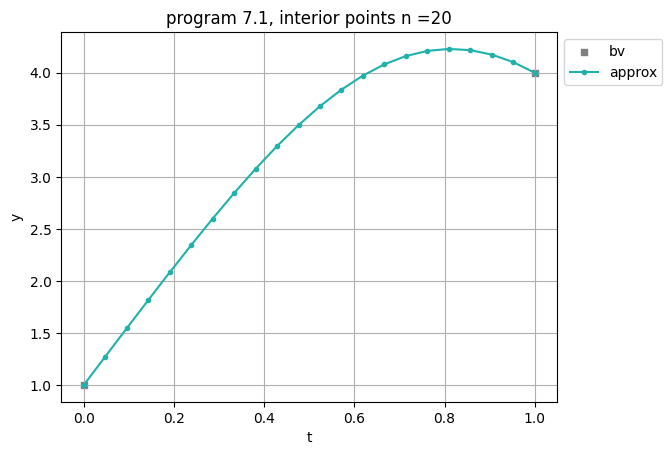

In [ ]:
# example 09 # program 7.1 nonlinear bvp w fdm, nmv # nlbvpfd

# n = intermediate points ~ n+1 = number subintervals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def f(w,t,bv,n): # F(w)
  y = np.zeros((n,1)) # y=zeros(n,1) # excludes endpoints
  h = (t[1]-t[0])/(n+1)

  y[0]   = bv[0]  - (2+pow(h,2))*w[0]   + pow(h,2)*pow(w[0],2)   + w[1]   # bc1 influence
  y[n-1] = w[n-2] - (2+pow(h,2))*w[n-1] + pow(h,2)*pow(w[n-1],2) + bv[1]  # bc2 influence
  for i in range(1,n-1):
    y[i] = w[i-1] - (2+pow(h,2))*w[i]   + pow(h,2)*pow(w[i],2)   + w[i+1] # the rest

  return y # only intermediate

def jac(w,t,bv,n): # DF(w)
  a = np.zeros((n,n))
  h = (t[1]-t[0])/(n+1)

  for i in range(n): # i=1:n
    a[i,i] = 2*pow(h,2)*w[i] - 2 - pow(h,2)

  for i in range(n-1): # i=1:n-1
    a[i,i+1] = a[i+1,i] = 1

  return a

def main():
  t,bv = [0,1],[1,4]
  n = 20     # intermediate points
  h = (t[1]-t[0])/(n+1)
  itmax = 20 # max iterations for multivariate

  w = np.zeros((n,1)) # initial guess of zeros
  s = np.zeros_like(w)

  # datastore
  ds = np.empty((n+2,1+1+1))     # t,bv,w
  ds[:] = np.nan # "empty" for plot
  # datastore, ic
  ds[0,:],ds[-1,:] = bv[0],bv[1]         # w0, bv
  ds[:,0] = np.linspace(t[0],t[1],n+2)   # t # after ws wrt ds[0,0],ds[n+1,0]
  #ds[:,1] = np.linspace(bv[0],bv[1],n+2) # w0, no interior points

  for it in range(itmax): # i=1:20 # lol its hardcode
    # w = w - w_n/w_d # newtons multivariate
    df = jac(w,t,bv,n)
    mf = f(w,t,bv,n)
    s = np.linalg.solve(df,mf) # <~ calcs!
    w -= s
  ds[1:w.shape[0]+1,2] = w.flatten()

  # dataframe from datastore
  s_title = "program 7.1, interior points n =" + str(n)
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",5)
  df = pd.DataFrame(data=ds,columns=["t","bv","wi"])
  if True: # spreadsheet
    display(df)

  if True: # plot
    print() # spacer
    ax1  = df.plot(x="t",y="bv",label="bv",color=".5",marker="s",kind="scatter")
    ax11 = df.plot(x="t",y="wi",label="approx",ax=ax1,color="lightseagreen",marker=".")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.6,1,3.5,4.5))
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()


##### example 10


example 10 looks fresh. solve nonlinear BVP
</br></br>

\begin{align}
  \text{example 10} \quad
  \left\{ \quad
    \begin{array}{l}
      y'' = y' - cosy \\
      y(0) = 1 \\
      y(\pi) = 1.
    \end{array}
  \right.
\end{align}
</br>


the discretized form at $t_i$
</br></br>

\begin{align}
  \frac{w_{i+1} - 2w_i + w_{i-1}}{h^2} - \frac{w_{i+1} - w_{i-1}}{2h} - cos(w_i) &= 0 \\
  \\
  \Downarrow \qquad\qquad\qquad & \\
  \\
  (1+\frac{h}{2})w_{i-1} - 2w_i + (1-\frac{h}{2})w_{i+1} - h^2cos(w_i) &= 0.
\end{align}
</br>

for $2\le i\le n-1$ and the boundary conditions:
</br></br>

\begin{align}
  (1+\frac{h}{2})y_a - 2w_1 + (1-\frac{h}{2})w_2 - h^2cos(w_1) &= 0 \\
  (1+\frac{h}{2})w_{n-1} - 2w_n + (1-\frac{h}{2})y_b - h^2cos(w_n) &= 0.
\end{align}
</br>

where $y_a = 0,y_b = 1$.
</br></br>

$$F(w) =
\begin{bmatrix}
  (1+\frac{h}{2})y_a - 2w_1 + (1-\frac{h}{2})w_2 - h^2cos(w_1) \\
  \vdots \\
  (1+\frac{h}{2})w_{i-1} - 2w_i + (1-\frac{h}{2})w_{i+1} - h^2cos(w_i)  \\
  \vdots \\
  (1+\frac{h}{2})w_{n-1} - 2w_n + (1-\frac{h}{2})y_b - h^2cos(w_n)
\end{bmatrix}$$
</br>

the jacobian of $F$ is
</br></br>

$$DF(w) =
\begin{bmatrix}
  -2+h^2sin(w_1) & 1-\frac{h}{2} & 0 & \cdots & 0 \\
  1+\frac{h}{2} & -2+h^2sin(w_2) & \ddots & \ddots & \vdots \\
  0 & 1+\frac{h}{2} & \ddots & 1-\frac{h}{2} & 0 \\
  \vdots & \ddots & \ddots & -2+h^2sin(w_{n-1}) & 1-\frac{h}{2} \\
  0 & \cdots & 0 & 1+\frac{h}{2} & -2+h^2sin(w_2)
\end{bmatrix}.$$
</br>


###### code, matlab


[matlab online](https:\\matlab.mathworks.com)
</br></br>

```
% Program 7.1 Nonlinear Finite Difference Method for BVP
% Uses Multivariate Newton's Method to solve nonlinear equation
% Inputs: interval inter, boundary values bv, number of steps n
% Output: solution w
% Example usage: w=sauer2_0710eg([0 pi],[0 1],40)
function w=sauer2_0710eg(inter,bv,n) % nlbvpfd
  a=inter(1); b=inter(2); ya=bv(1); yb=bv(2);
  h=(b-a)/(n+1); % h is step size
  w=zeros(n,1); % initialize solution array w
  for i=1:20 % loop of Newton step
    w=w-jac(w,inter,bv,n)\f(w,inter,bv,n);
  end
  plot([a a+(1:n)*h b],[ya w' yb]); % plot w with boundary data

function y=f(w,inter,bv,n)
  y=zeros(n,1);h=(inter(2)-inter(1))/(n+1);
  y(1)=-2*w(1)+(1+h/2)*bv(1)+(1-h/2)*w(2)-h*h*cos(w(1));
  y(n)=(1+h/2)*w(n-1)-2*w(n)-h*h*cos(w(n))+(1-h/2)*bv(2);
  for j=2:n-1
    y(j)=-2*w(j)+(1+h/2)*w(j-1)+(1-h/2)*w(j+1)-h*h*cos(w(j));
  end

function a=jac(w,inter,bv,n)
  a=zeros(n,n);h=(inter(2)-inter(1))/(n+1);
  for j=1:n
    a(j,j)=-2+h*h*sin(w(j));
  end
  for j=1:n-1
    a(j,j+1)=1-h/2;
    a(j+1,j)=1+h/2;
  end
```



###### code, python




program 7.1, interior points n =20



<ipython-input-22-1ec91e086bcf>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a[i,i] = -2 + pow(h,2)*np.sin(w[i])


,t,bv,wi
0,0.00000,1.0,1.00000
1,0.14960,NaN,0.89376
2,0.29920,NaN,0.78549
3,0.44880,NaN,0.67682
4,0.59840,NaN,0.56943
...,...,...,...
17,2.54319,NaN,0.15664
18,2.69279,NaN,0.29393
19,2.84239,NaN,0.47656
20,2.99199,NaN,0.71022


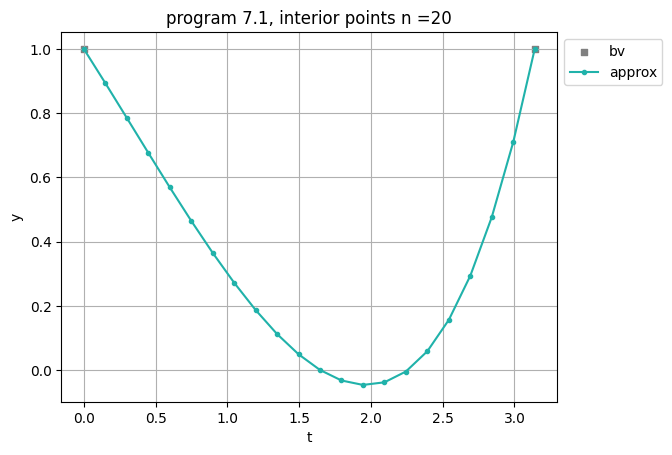

In [22]:
def f(w,t,bv,n):
  y = np.zeros((n,1)) # y=zeros(n,1) # excludes endpoints
  h = (t[1]-t[0])/(n+1)

  y[0]   = -2*w[0]        + (1+h/2)*bv[0]  + (1-h/2)*w[1]            - pow(h,2)*np.cos(w[0]) # bc1 influence
  y[n-1] = (1+h/2)*w[n-2] - 2*w[n-1]       - pow(h,2)*np.cos(w[n-1]) + (1-h/2)*bv[1]         # bc2 influence
  for i in range(1,n-1):
    y[i] = -2*w[i]        + (1+h/2)*w[i-1] + (1-h/2)*w[i+1]        - pow(h,2)*np.cos(w[i])   # the rest

  return y # only intermediate


def jac(w,t,bv,n):
  a = np.zeros((n,n))
  h = (t[1]-t[0])/(n+1)

  for i in range(n): # i=1:n
    a[i,i] = -2 + pow(h,2)*np.sin(w[i])

  for i in range(n-1): # i=1:n-1
    a[i,i+1] = 1 - h/2
    a[i+1,i] = 1 + h/2

  return a

def main():
  tt,bv = [0,np.pi],[1,1]
  n = 20     # intermediate points
  h = (tt[1]-tt[0])/(n+1)
  itmax = 20 # max iterations for multivariate

  w = np.zeros((n,1)) # initial guess of zeros
  s = np.zeros_like(w)

  # datastore
  ds = np.empty((n+2,1+1+1))     # t,bv,w
  ds[:] = np.nan # "empty" for plot
  # datastore, ic
  ds[0,:],ds[-1,:] = bv[0],bv[1]         # w0, bv
  ds[:,0] = np.linspace(tt[0],tt[1],n+2)   # t # after ws wrt ds[0,0],ds[n+1,0]
  #ds[:,1] = np.linspace(bv[0],bv[1],n+2) # w0, no interior points

  for it in range(itmax): # i=1:20 # lol its hardcode
    # w = w - w_n/w_d # newtons multivariate
    df = jac(w,tt,bv,n)
    mf = f(w,tt,bv,n)
    s = np.linalg.solve(df,mf) # <~ calcs!
    w -= s
  ds[1:w.shape[0]+1,2] = w.flatten()

  # dataframe from datastore
  s_title = "program 7.1, interior points n =" + str(n)
  print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
  pd.set_option("display.max_rows",10)
  pd.set_option("display.precision",5)
  df = pd.DataFrame(data=ds,columns=["t","bv","wi"])
  if True: # spreadsheet
    display(df)

  if True: # plot
    print() # spacer
    ax1  = df.plot(x="t",y="bv",label="bv",color=".5",marker="s",kind="scatter")
    ax11 = df.plot(x="t",y="wi",label="approx",ax=ax1,color="lightseagreen",marker=".")
    ax1.set_title(s_title)
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    #ax1.axis((.6,1,3.5,4.5))
    ax1.grid('on',which='major',axis='x')
    ax1.grid('on',which='major',axis='y')

    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

if __name__ == "__main__":
  main()

